## Decision Trees: Mastering the Bias-Variance Trade-Off with max_depth



Author: Gopal Reddy Marella

GitHub Repository Link: https://github.com/gopalreddymarella402/decision-tree-tutorial

## How to Run This Notebook

To fully reproduce this analysis, first install the necessary packages and then execute all code cells sequentially. The figures will be displayed inline and saved to a local folder named figures/. The experiment results (scores) will be saved to a results/ folder as a CSV file.

## Quick Installation Command

!pip install numpy matplotlib scikit-learn

## 1. Configuration, Libraries, and Global Seeds

This section sets up the environment, defines global parameters for reproducibility, and imports necessary libraries.

## Imports and Global Configuration

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import random
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Grouped Hyperparameters Dictionary (CONFIG)
CONFIG = {
    'DATASET_SIZE': 500,
    'NOISE_LEVEL': 0.35,
    'RANDOM_STATE': 42,
    'TEST_SIZE': 0.3,
    'MAX_DEPTH_RANGE': (1, 16) # Non-inclusive end bound
}
GLOBAL_RANDOM_STATE = CONFIG['RANDOM_STATE']

# Global Reproducibility Seeds
np.random.seed(GLOBAL_RANDOM_STATE)
random.seed(GLOBAL_RANDOM_STATE) # For general Python random operations

# directories for saving outputs
FIGURE_DIR = 'figures'
RESULTS_DIR = 'results' # New directory for numeric outputs
os.makedirs(FIGURE_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

## Environment Check and Requirements

This cell confirms the versions of the key packages used, ensuring the code runs predictably.



In [25]:
print("--- Required Package Versions ---")
required_packages = {
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__,
    "scikit-learn": sklearn.__version__
}

for package, version in required_packages.items():
    print(f"- {package}: {version}")

print("\nRequirements for replication (minimum):")
print("scikit-learn>=1.0, numpy>=1.20, matplotlib>=3.4")
print("---------------------------------------")

--- Required Package Versions ---
- numpy: 2.3.4
- matplotlib: 3.10.7
- scikit-learn: 1.8.0

Requirements for replication (minimum):
scikit-learn>=1.0, numpy>=1.20, matplotlib>=3.4
---------------------------------------


 ## Decision Boundary Plotting Function

We define a function to visualize the decision boundary clearly. Note the use of diverse colors and markers for enhanced accessibility.

In [26]:
def plot_decision_boundary(clf, X, y, title, filename):
    """
    Plots the decision boundary of a trained classifier (clf) along with 
    the training and test data points.

    Args:
        clf: A trained scikit-learn classifier instance.
        X: The full feature set.
        y: The full target set.
        title (str): The title for the plot.
        filename (str): The path/name to save the figure file.
    """
    # Set up the plot region
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define color maps for better contrast and accessibility
    cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC']) # Light red/green for background
    cmap_bold = ListedColormap(['#D90000', '#007A00']) # Darker red/green for data points

    plt.figure(figsize=(7, 5))
    
    # Plot the decision boundary background
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Plot the training points (circles 'o')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, 
                edgecolor='k', marker='o', s=40, label="Training Data")
    
    # Plot the test points (crosses 'x')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, 
                edgecolor='k', marker='x', s=60, linewidth=2, label="Test Data")

    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Save the figure and display
    plt.savefig(os.path.join(FIGURE_DIR, filename), bbox_inches='tight')
    plt.show()

print("Configuration set, plotting function defined, and figures/results directories created.")


Configuration set, plotting function defined, and figures/results directories created.


## 2. Dataset Preparation

We use the synthetic make_moons dataset, which presents a challenge for linear models and perfectly highlights the difference between simple and complex decision boundaries.

In [27]:
# 2.1 Generate the data using configured parameters
X, y = make_moons(n_samples=CONFIG['DATASET_SIZE'], noise=CONFIG['NOISE_LEVEL'], random_state=GLOBAL_RANDOM_STATE)

# 2.2 Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=CONFIG['TEST_SIZE'], random_state=GLOBAL_RANDOM_STATE
)

# --- Explicit Asserts / Sanity Checks ---
assert X.shape[0] == CONFIG['DATASET_SIZE'], "Error: Total data size mismatch."
assert X.shape[1] == 2, "Error: Expected 2 features for 2D plotting."
assert len(np.unique(y)) == 2, "Error: Expected binary classification (2 classes)."

print(f"Dataset generated (N={CONFIG['DATASET_SIZE']}) and split into {len(X_train)} training and {len(X_test)} testing samples.")


Dataset generated (N=500) and split into 350 training and 150 testing samples.


## 3. Experiment: Three Decision Depths

We will train three models with dramatically different depths to visualize the bias-variance spectrum.

## Scenario 1: High Bias (Underfitting)

max_depth=2 creates a simple, highly biased model. It cannot capture the complexity of the moon shapes.

--- Underfitting Model (max_depth=2) ---
Training Accuracy: 0.8886
Testing Accuracy: 0.8533


/var/folders/h3/6l1zvdm563n96qffq5hgzkf80000gn/T/ipykernel_8941/1323234735.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,


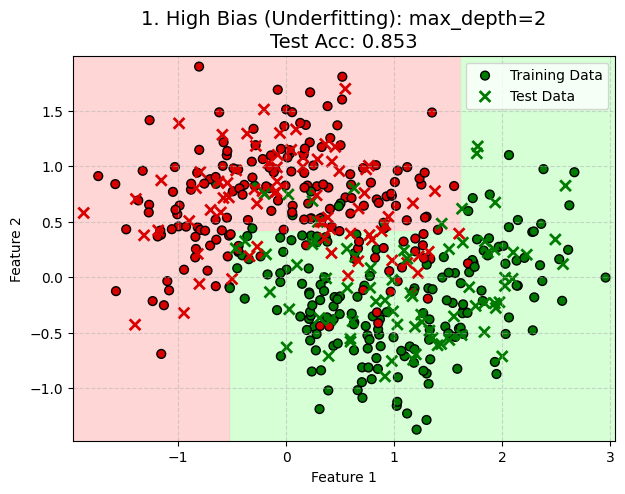

In [28]:
dt_underfit = DecisionTreeClassifier(max_depth=2, random_state=GLOBAL_RANDOM_STATE)
dt_underfit.fit(X_train, y_train)

train_acc_underfit = dt_underfit.score(X_train, y_train)
test_acc_underfit = dt_underfit.score(X_test, y_test)

print(f"--- Underfitting Model (max_depth=2) ---")
print(f"Training Accuracy: {train_acc_underfit:.4f}")
print(f"Testing Accuracy: {test_acc_underfit:.4f}")

plot_decision_boundary(dt_underfit, X, y, 
                       f'1. High Bias (Underfitting): max_depth=2\nTest Acc: {test_acc_underfit:.3f}',
                       'figure_1_high_bias.png')


Figure 1 Description: This plot indicates the choice limit of a Decision Tree with a maximum depth of 2. It is a straight-line-like border, which does not divide the two moon-like groups well. Training points (circles) and test points (crosses) are both misclassified on the boundary, which means that there is high bias and underfitting.

## Scenario 2: Balanced Complexity (Optimal)

max_depth=5 often provides a good balance, capturing the general non-linear structure without fitting noise.

--- Balanced Model (max_depth=5) ---
Training Accuracy: 0.9229
Testing Accuracy: 0.8600


/var/folders/h3/6l1zvdm563n96qffq5hgzkf80000gn/T/ipykernel_8941/1323234735.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,


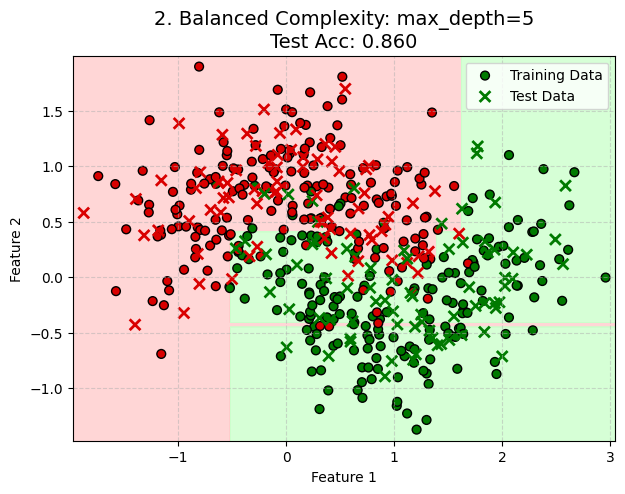

In [29]:
dt_balanced = DecisionTreeClassifier(max_depth=5, random_state=GLOBAL_RANDOM_STATE)
dt_balanced.fit(X_train, y_train)

train_acc_balanced = dt_balanced.score(X_train, y_train)
test_acc_balanced = dt_balanced.score(X_test, y_test)

print(f"--- Balanced Model (max_depth=5) ---")
print(f"Training Accuracy: {train_acc_balanced:.4f}")
print(f"Testing Accuracy: {test_acc_balanced:.4f}")

plot_decision_boundary(dt_balanced, X, y, 
                       f'2. Balanced Complexity: max_depth=5\nTest Acc: {test_acc_balanced:.3f}',
                       'figure_2_optimal.png')

Figure 2 Description: The maximum decision tree depth of 5, which is represented by this plot, shows the decision boundary. The boundary is very close to the natural curvature of the two moon-shaped clusters, it has managed to divide them and is smooth. Testing accuracy is best in all the three scenarios thus showing best generalization.

## Scenario 3: High Variance (Overfitting)

max_depth=None (or a very large number) allows the tree to grow until every leaf is pure, leading to high variance and overfitting the training noise.

--- Overfitting Model (max_depth=None) ---
Training Accuracy: 1.0000
Testing Accuracy: 0.8200


/var/folders/h3/6l1zvdm563n96qffq5hgzkf80000gn/T/ipykernel_8941/1323234735.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,


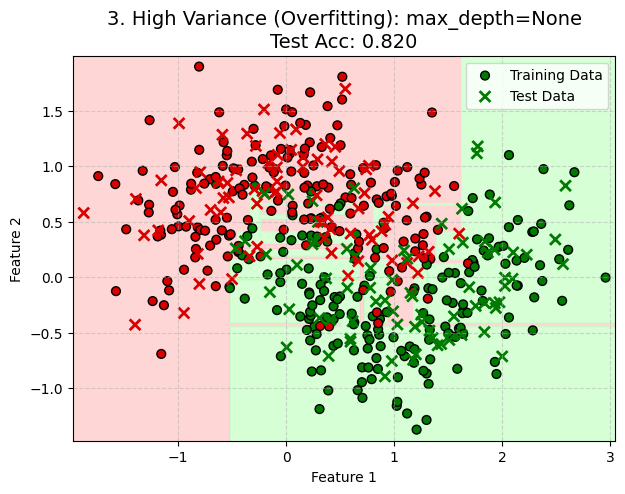

In [30]:
dt_overfit = DecisionTreeClassifier(max_depth=None, random_state=GLOBAL_RANDOM_STATE)
dt_overfit.fit(X_train, y_train)

train_acc_overfit = dt_overfit.score(X_train, y_train)
test_acc_overfit = dt_overfit.score(X_test, y_test)

print(f"--- Overfitting Model (max_depth=None) ---")
print(f"Training Accuracy: {train_acc_overfit:.4f}")
print(f"Testing Accuracy: {test_acc_overfit:.4f}")

plot_decision_boundary(dt_overfit, X, y, 
                       f'3. High Variance (Overfitting): max_depth=None\nTest Acc: {test_acc_overfit:.3f}',
                       'figure_3_high_variance.png')


Figure 3 Description: This plot indicates the boundary of the decision of unconstrained Decision Tree (max_depth=None). The boundary is very jagged and complex which forms numerous isolated areas surrounding each data point in training. This indicates that the model is learning noise thus having high training accuracy but reduced test accuracy because of large variance and poor generalization.


## 4. Visualizing the Bias-Variance Trade-Off Curve

To find the optimal depth, we plot the training and testing accuracy across a range of max_depth values. The point where the test accuracy peaks and begins to diverge from the training accuracy is the sweet spot.

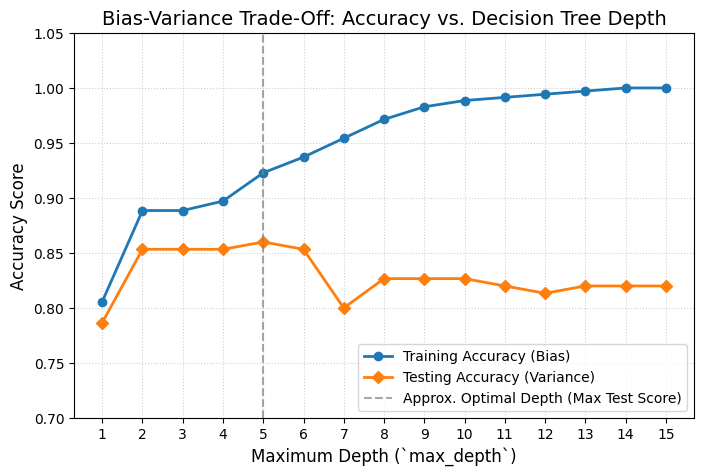


Experiment scores saved to: results/bias_variance_scores.csv


In [31]:
# 4.1 Run the experiment across multiple depths
depths = range(CONFIG['MAX_DEPTH_RANGE'][0], CONFIG['MAX_DEPTH_RANGE'][1])
train_scores = []
test_scores = []

for depth in depths:
    # Use GLOBAL_RANDOM_STATE for consistency
    dt = DecisionTreeClassifier(max_depth=depth, random_state=GLOBAL_RANDOM_STATE) 
    dt.fit(X_train, y_train)
    
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# 4.2 Plot the trade-off curve
plt.figure(figsize=(8, 5))
# Use distinct colors and markers for accessibility (blue circles, orange diamonds)
plt.plot(depths, train_scores, marker='o', label='Training Accuracy (Bias)', 
         color='#1f77b4', linewidth=2)
plt.plot(depths, test_scores, marker='D', label='Testing Accuracy (Variance)',
         color='#ff7f0e', linewidth=2)

plt.title('Bias-Variance Trade-Off: Accuracy vs. Decision Tree Depth', fontsize=14)
plt.xlabel('Maximum Depth (`max_depth`)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(depths)
plt.axvline(x=5, color='gray', linestyle='--', alpha=0.7, 
            label='Approx. Optimal Depth (Max Test Score)')

plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.ylim(0.7, 1.05)

# Save the figure and display
plt.savefig(os.path.join(FIGURE_DIR, 'figure_4_trade_off_curve.png'), bbox_inches='tight')
plt.show()

#Saving Numeric Results 
results = np.column_stack((list(depths), train_scores, test_scores))
results_filename = os.path.join(RESULTS_DIR, 'bias_variance_scores.csv')

np.savetxt(
    results_filename,
    results,
    delimiter=',',
    header='Max_Depth,Training_Accuracy,Testing_Accuracy',
    comments=''
)
print(f"\nExperiment scores saved to: {results_filename}")


Figure 4 Description:This line plot contours the Bias-Variance Trade-Off curve by plotting Training and Testing Accuracies (blue circles and orange diamonds respectively) at 15 values of Maximum Depth. Training Accuracy steadily increases to 1.0, Testing Accuracy increases, peaks at depth 5, and followed by a small decrease and flattens which is a clear indication of where the increasing complexity starts affecting the generalization (high variance) negatively.

 ## References and Resources

Scikit-learn Documentation: Decision Tree Classifier (sklearn.tree.DecisionTreeClassifier). Resource used for code implementation and parameter definitions.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Hastie, T., Tibshirani, R., Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer. Chapter 9: Additive Models, Trees, and Related Methods. Resource used for understanding the theoretical bias-variance relationship.

Towards Data Science Article: Understanding the Bias-Variance Tradeoff in Machine Learning. Resource used for clear conceptual intuition and visualization planning.

[A conceptual blog post covering the trade-off with visual examples.]